In [1]:
# Important libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
np.random.seed(4440)

In [2]:
# import datas

stocks_df = pd.read_excel("pricesperday.xlsx", header=None, names=range(1,20+1))
stocks_df.tail(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
250,2.62,4.48,8.00,24.28,19.42,12.94,21.59,4.50,0.70,10.70,9.12,21.70,12.72,3.3,0.35,6.78,3.98,5.16,13.0,8.10
251,2.61,4.42,8.10,24.36,19.52,12.90,21.41,4.42,0.69,11.30,9.08,21.68,10.50,3.3,0.35,6.70,3.98,5.18,13.0,8.08
252,2.60,4.46,8.12,24.28,19.43,12.86,21.39,4.36,0.69,10.24,9.08,21.78,10.60,3.4,0.35,6.70,3.98,5.30,14.0,8.00


In [3]:
# correlation matrix

log_return_df = (np.log(stocks_df) - np.log(stocks_df).shift()).dropna()
corr_mat = pd.DataFrame(np.corrcoef(log_return_df.T), range(1,20+1), range(1,20+1))
np.fill_diagonal(corr_mat.values, np.nan)
corr_mat.tail(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
18,0.294642,0.476994,0.345680,0.453944,0.390268,0.487185,0.455064,0.476378,0.212269,0.161440,0.426041,0.231858,0.214153,0.321123,0.312703,0.397461,0.491345,NaN,0.191529,0.331595
19,0.029851,0.089607,0.113781,0.008734,0.084001,-0.002956,0.063936,0.074344,0.048774,-0.011897,0.061622,0.091630,0.121640,0.079039,0.079372,0.150776,0.154533,0.191529,NaN,0.029188
20,0.207010,0.180868,0.139721,0.337458,0.285113,0.259426,0.260097,0.221328,-0.000163,0.142851,0.117991,0.245859,0.142896,0.152063,0.114221,0.315896,0.270237,0.331595,0.029188,NaN


In [4]:
# distance matrix

dist_mat = np.sqrt(2*(1-corr_mat))
dist_mat.tail(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
18,1.187736,1.022748,1.143958,1.045042,1.104293,1.012734,1.043969,1.023350,1.255174,1.295037,1.071409,1.239469,1.253672,1.165227,1.172431,1.097760,1.008618,NaN,1.271590,1.156205
19,1.392946,1.349365,1.331329,1.408024,1.353514,1.416303,1.368257,1.360629,1.379294,1.422601,1.369948,1.347865,1.325413,1.357174,1.356929,1.303245,1.300359,1.271590,NaN,1.393422
20,1.259357,1.279947,1.311701,1.151123,1.195731,1.217024,1.216473,1.247936,1.414329,1.309312,1.328163,1.228121,1.309278,1.302257,1.330999,1.169704,1.208108,1.156205,1.393422,NaN


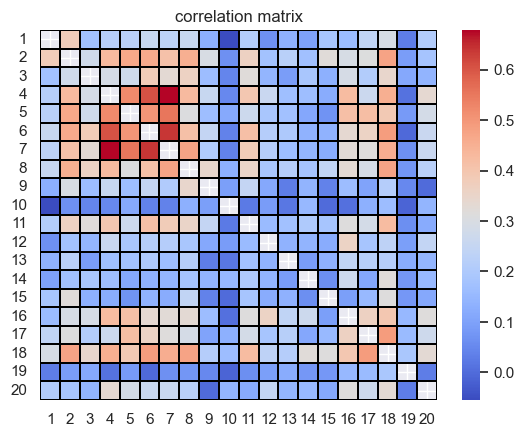

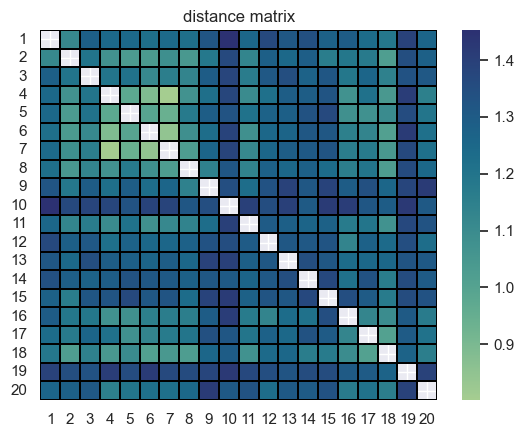

In [5]:
# visualization

sns.heatmap(corr_mat, linewidths=0.01, linecolor='black', cmap='coolwarm')
plt.setp(plt.gca().get_yticklabels(), rotation=0)
plt.title('correlation matrix')
plt.show()

sns.heatmap(dist_mat, linewidths=0.01, linecolor='black', cmap='crest')
plt.setp(plt.gca().get_yticklabels(), rotation=0)
plt.title('distance matrix')
plt.show()